In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DSH import SharedFunctions as sf
from DSH import IOfunctions as DSHiof
from DSH import ROIproc as RP

### Period-averaged Lissajous

In [3]:
froot = r'D:\steaime\Documents\Research\Chiara\Data\240125'
subf = 'period2s_strainstressdata'

fnames = sf.FindFileNames(os.path.join(froot, subf), Prefix='0', Ext='.txt')
Np = 100
dt = 0.02

times = np.arange(Np, dtype=float)*dt
merged = [times]
merg_hdr = 't[s]'
for f in fnames:
    strain, shrate, stress = np.loadtxt(os.path.join(froot, subf, f), usecols=(0,1,2), skiprows=1, unpack=True)
    avg_strain, avg_shrate, avg_stress = np.zeros(Np, dtype=float), np.zeros(Np, dtype=float), np.zeros(Np, dtype=float)
    for i in range(Np):
        avg_strain[i], avg_shrate[i], avg_stress[i] = np.mean(strain[Np+i::Np]), np.mean(shrate[Np+i::Np]), np.mean(stress[Np+i::Np])
    np.savetxt(os.path.join(froot, subf, f[:-4]+'_avgT.dat'), np.vstack((times, avg_strain, avg_shrate, avg_stress)).T) #, header='t\tstrain\tstress', delimiter='\t')
    merged.append(avg_strain)
    merged.append(avg_stress)
    merg_hdr += '\t'
    merg_hdr += 'strain_' + f[:-4] + '\tstress_' + f[:-4]
np.savetxt(os.path.join(froot, subf, '_avgT_merged.dat'), np.asarray(merged).T, header=merg_hdr, delimiter='\t')

### Period-averaged cIs

In [2]:
qparall = 9
gap = 0.607
sinc_arg_scale = 0.5*qparall*gap*1e3

strain_list = {'004': 0.0021, '006': 0.01, '006_1': 0.015, '007': 0.0215, '007_1': 0.03, 
               '008': 0.0464, '008_1': 0.075, '009': 0.1, '009_1': 0.13, '009_2': 0.16, 
               '009_3': 0.19, '010': 0.215, '011': 0.464, '012': 1}
for key in strain_list.keys():
    print(strain_list[key]/gap)

0.0034596375617792423
0.016474464579901153
0.02471169686985173
0.03542009884678748
0.04942339373970346
0.07644151565074135
0.12355848434925865
0.16474464579901155
0.214168039538715
0.26359143327841844
0.31301482701812194
0.3542009884678748
0.7644151565074135
1.6474464579901154


cI_data.shape = (2000, 2000)
times         = [334.530567 334.630615 334.730591 ... 534.230584 534.330584 534.430577]
lagidx_list   = [   0    1    2 ... 1997 1998 1999]


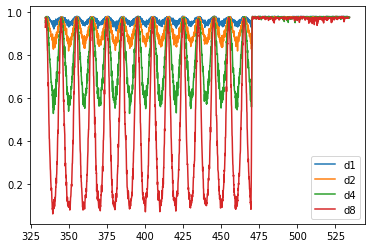

In [6]:
expid = '004'
fbase = r'F:\240125_Oscills_LS\20s'
froot = os.path.join(fbase, expid + '_001_OscillSState_out')

ROIname = 'ROI000'
cI_data, times, lagidx_list = DSHiof.ReadCIfile(os.path.join(froot, 'cI_' + ROIname + '_e00.dat'))



if expid=='004':
    strain_amp = 0.0021
    t0idx = 8.6
elif expid=='006':
    strain_amp = 0.01
    t0idx = 98
elif expid=='006_1':
    strain_amp = 0.015
    t0idx = 89
elif expid=='007':
    strain_amp = 0.0215
    t0idx = 102.5
elif expid=='007_1':
    strain_amp = 0.03
    t0idx = 76
elif expid=='008':
    strain_amp = 0.0464
    t0idx = 98.5
elif expid=='008_1':
    strain_amp = 0.075
    t0idx = 97.5
elif expid=='009':
    strain_amp = 0.1
    t0idx = 58
elif expid=='009_1':
    strain_amp = 0.13
    t0idx = 108
elif expid=='009_2':
    strain_amp = 0.16
    t0idx = 116
elif expid=='009_3':
    strain_amp = 0.19
    t0idx = 129
elif expid=='010':
    strain_amp = 0.215
    t0idx = 58
elif expid=='011':
    strain_amp = 0.464
    t0idx = 70.5
elif expid=='012':
    strain_amp = 1
    t0idx = 69.8
    
t0idx_int = int(np.floor(t0idx)) 
t0 = times[t0idx_int] + (t0idx-t0idx_int)*(times[t0idx_int+1]-times[t0idx_int])
strain = (strain_amp/gap)*np.cos(2*np.pi*(times - t0)/20)
lagmax = 200

print('cI_data.shape = ' + str(cI_data.shape))
print('times         = ' + str(times))
print('lagidx_list   = ' + str(np.asarray(lagidx_list)))
for i in [1,2,4,8]:
    plt.plot(times, cI_data[:,i], label='d'+str(lagidx_list[i]))
plt.legend()

Load rheology

In [7]:
rheo_fname = os.path.join(fbase, '20s_avgT_merged.dat')
rheo_data = pd.read_csv(rheo_fname, sep='\t')
rheo_data.head()

,# t[s],strain_006_OscillSState,stress_006_OscillSState,strain_007_1_OscillSState,stress_007_1_OscillSState,strain_007_OscillSState,stress_007_OscillSState,strain_008_1_OscillSState,stress_008_1_OscillSState,strain_008_OscillSState,...,strain_009_3_OscillSState,stress_009_3_OscillSState,strain_009_OscillSState,stress_009_OscillSState,strain_010_OscillSState,stress_010_OscillSState,strain_011_OscillSState,stress_011_OscillSState,strain_012_OscillSState,stress_012_OscillSState
0,0.00,-0.000014,-2.235147,-0.000054,-0.308913,-0.000035,-1.808601,-0.000137,10.068960,-0.000085,...,-0.000350,29.665590,-0.000184,17.586400,-0.000390,32.234913,-0.000841,35.867176,-0.001811,40.127616
1,0.02,0.000084,-2.007644,0.000260,-0.273153,0.000181,-1.210551,0.000640,9.818632,0.000392,...,0.001623,29.532591,0.000860,17.312942,0.001836,32.247848,0.003968,35.971870,0.008540,39.897986
2,0.04,0.000188,-2.250363,0.000567,0.117479,0.000410,-1.149531,0.001414,10.577072,0.000878,...,0.003592,29.943918,0.001892,17.335767,0.004057,32.237652,0.008767,35.616847,0.018890,40.023072
3,0.06,0.000289,-1.923491,0.000880,0.288371,0.000625,-1.187878,0.002192,9.994849,0.001353,...,0.005554,29.657676,0.002922,17.890446,0.006288,32.633459,0.013564,35.818783,0.029240,39.918527
4,0.08,0.000393,-1.958797,0.001188,0.245154,0.000850,-0.832853,0.002971,10.469941,0.001834,...,0.007522,29.680656,0.003961,17.849359,0.008511,32.876177,0.018378,35.506976,0.039582,39.813680


In [8]:
rheo_strain = np.asarray(rheo_data['strain_'+expid+'_OscillSState'])
rheo_stress = np.asarray(rheo_data['stress_'+expid+'_OscillSState'])
plt.plot(rheo_strain, rheo_stress)

KeyError: 'strain_004_OscillSState'

In [9]:
stress=np.zeros_like(strain)
for i in range(len(stress)):
    cur_tidx = np.argmin(np.abs(strain[i]-rheo_strain))
    stress[i] = rheo_stress[cur_tidx]
plt.plot(strain, stress, '.')

NameError: name 'rheo_strain' is not defined

Restrict analysis to steady state

In [10]:
t1 = 0
t2 = 1300
times_cut = times[t1:t2]
cI_data_cut = cI_data[t1:t2, :lagmax]
lagidx_cut = lagidx_list[:lagmax]

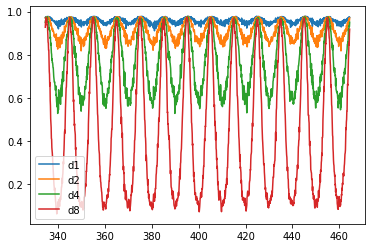

In [11]:
for i in [1,2,4,8]:
    plt.plot(times_cut, cI_data_cut[:,i], label='d'+str(lagidx_list[i]))
plt.legend()

Identify period

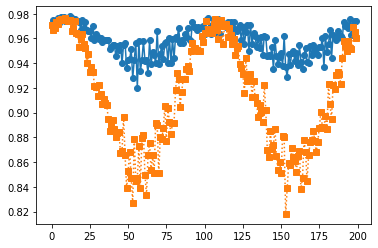

In [12]:
plt.plot(cI_data_cut[:200,1], 'o-')
plt.plot(cI_data_cut[:200,2], 's:')

Define averaging intervals

In [13]:
Nperiod = 40
Nperiod = 200
avg_ints = [[i, t2-t1, Nperiod] for i in range(0,Nperiod)] #Interval [min_idx, max_idx, period_idx]
#avg_ints

Compute averages

In [14]:
g2m1, g2m1_lags = RP.AverageCorrTimetrace(cI_data_cut, times_cut, lagidx_cut, avg_interval=avg_ints, return_stderr=False, sharp_bound=True, lag_tolerance=1e-2, lag_tolerance_isrelative=False)
print('g2m1 shape: {0} (check: {1})'.format(g2m1.shape, g2m1_lags.shape))

g2m1 shape: (200, 200) (check: (200, 200))


Display results

Text(0, 0.5, '$t$ [frames]')

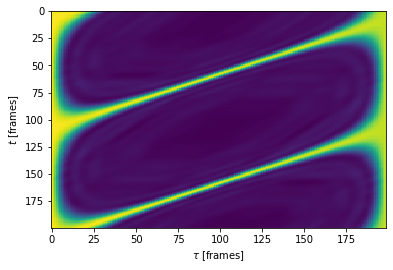

In [15]:
fig, ax = plt.subplots()
ax.imshow(g2m1[:,1:], aspect='auto', interpolation='none')
ax.set_xlabel(r'$\tau$ [frames]')
ax.set_ylabel(r'$t$ [frames]')

Text(0, 0.5, '$c_I$')

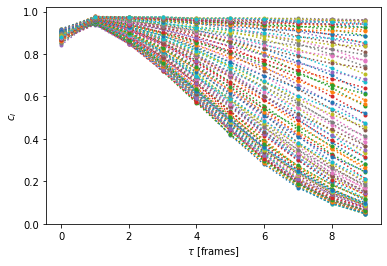

In [16]:
fig, ax = plt.subplots()
for i in range(Nperiod//2):
    ax.plot(g2m1[(i+t0idx_int)%Nperiod,:10], '.:', label=str(i))
ax.set_xlabel(r'$\tau$ [frames]')
ax.set_ylabel(r'$c_I$')
#fig.legend()

In [17]:
save_transpose = False
save_fpath = os.path.join(froot, ROIname + '_avgT.dat')
if save_transpose:
    g2m1_export = np.concatenate(([g2m1_lags[0]], g2m1), axis=0).T
    g2m1_hdr = 'tau[frames]\tt' + '\tt'.join([str(i) for i in range(Nperiod)])
    np.savetxt(save_fpath, g2m1_export, header=g2m1_hdr, delimiter='\t')
else:
    g2m1_export = np.concatenate(([times[t1:t1+Nperiod]], g2m1.T), axis=0).T
    g2m1_hdr = 't\ttau=' + '\ttau='.join(['{0:.3f}'.format(d) for d in g2m1_lags[0]])
    np.savetxt(save_fpath, g2m1_export, header=g2m1_hdr, delimiter='\t')

Affine dynamics: compare with expected sinc2 behavior

Reversible nonaffinities: log cI vs dgamma^2

C:\Users\steaime\miniconda3\envs\DSH\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log
C:\Users\steaime\miniconda3\envs\DSH\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


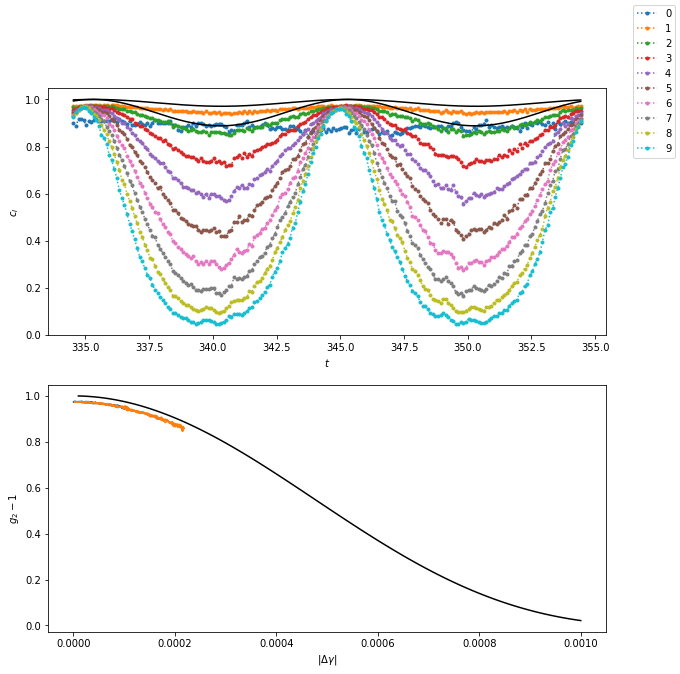

In [21]:
save_affstrain_th = True

save_affstrain = [times[t1:t1+Nperiod], strain[t1:t1+Nperiod], stress[t1:t1+Nperiod]]
save_MSD = [times[t1:t1+Nperiod], strain[t1:t1+Nperiod], stress[t1:t1+Nperiod]]
save_hdr = 't\tgamma\tstress'
save2_hdr = 't\tgamma\tstress'

fig, ax = plt.subplots(figsize=(10,10), nrows=2)
for i in range(g2m1.shape[1]):
    if i>0:
        cur_dstrain = strain[i:] - strain[:-i]
        sincarg = cur_dstrain*sinc_arg_scale
        cur_affcorr = np.square(np.sin(sincarg)/sincarg)
        if i < 3:
            ax[0].plot(times[t1:t1+Nperiod], cur_affcorr[t1:t1+Nperiod], 'k-')
            ax[1].plot(np.abs(cur_dstrain[t1:t1+Nperiod]), g2m1[:,i])
        if save_affstrain_th:
            save_affstrain.append(cur_affcorr[t1:t1+Nperiod])
        else:
            save_affstrain.append(cur_dstrain[t1:t1+Nperiod])
            save_hdr += '\tdgamma(d{0})'.format(i)
        save_MSD.append(np.square(cur_dstrain[t1:t1+Nperiod]))
        save2_hdr += '\tdgamma2(d{0})'.format(i)
    if i < 10:
        ax[0].plot(times[t1:t1+Nperiod], g2m1[:,i], '.:', label=str(i))
    if not save_affstrain_th:
        save_affstrain.append(g2m1[:,i])
    save_MSD.append(-3*np.log(g2m1[:,i])/qparall**2)
    save_hdr += '\tcI(d{0})'.format(i)
    save2_hdr += '\tMSD(d{0})'.format(i)
if save_affstrain_th:
    np.savetxt(os.path.join(froot, ROIname + '_avgT_affresc_th.dat'), np.asarray(save_affstrain).T, header=save_hdr, delimiter='\t')
else:
    np.savetxt(os.path.join(froot, ROIname + '_avgT_affresc.dat'), np.asarray(save_affstrain).T, header=save_hdr, delimiter='\t')
np.savetxt(os.path.join(froot, ROIname + '_avgT_MSD.dat'), np.asarray(save_MSD).T, header=save2_hdr, delimiter='\t')

sinc_xax = np.linspace(0,1e-3,100)
ax[1].plot(sinc_xax, np.square(np.sin(sinc_xax*sinc_arg_scale)/(sinc_xax*sinc_arg_scale)), 'k-')
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$c_I$')
#ax[1].set_xscale('log')
#ax[1].set_yscale('log')
ax[1].set_xlabel(r'$|\Delta\gamma|$')
ax[1].set_ylabel(r'$g_2-1$')
fig.legend()

Reversible plasticity: plot the correlation for zero delta_gamma as a function of time delay

No handles with labels found to put in legend.


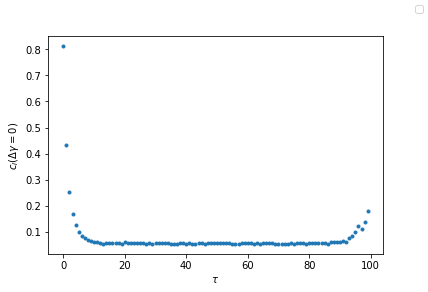

In [53]:
corr_zerostrain = []
lags_zerostrain = []
for i in range(1,g2m1.shape[1],2):
    if i>0:
        cur_dstrain = strain[i:] - strain[:-i]
        cur_tidx = np.argmin(np.abs(cur_dstrain[t1:t1+Nperiod]))
        if cur_tidx>0 and cur_tidx+1<=g2m1.shape[0]:
            cur_corr = np.max(g2m1[cur_tidx-1:cur_tidx+2,i])
        else:
            cur_corr = g2m1[cur_tidx,i]
        corr_zerostrain.append(cur_corr)
        lags_zerostrain.append(i)
np.savetxt(os.path.join(froot, ROIname + '_corr_zerodeltagamma.dat'), np.asarray([lags_zerostrain, corr_zerostrain]).T, 
           header='lag[frames]\tcorr', delimiter='\t')

fig, ax = plt.subplots()
ax.plot(corr_zerostrain, '.')
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$c_I(\Delta\gamma=0)$')
fig.legend()